<a href="https://colab.research.google.com/github/alvarocros/uche/blob/main/scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
busqueda = 'cerveza turia'
web = requests.get('https://tienda.consum.es/es/s/+busqueda.replace(" ","%20")')
soup = BeautifulSoup(web.text,"lxml")
print(soup)

<!DOCTYPE html>
<html lang=""><head>
<meta charset="utf-8"/>
<title></title>
<base href="/"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="favicon.ico" rel="icon" type="image/x-icon"/>
<style>:root{--blue:#007bff;--indigo:#6610f2;--purple:#6f42c1;--pink:#e83e8c;--red:#dc3545;--orange:#fd7e14;--yellow:#ffc107;--green:#28a745;--teal:#20c997;--cyan:#17a2b8;--white:#fff;--gray:#6c757d;--gray-dark:#343a40;--primary:#007bff;--secondary:#6c757d;--success:#28a745;--info:#17a2b8;--warning:#ffc107;--danger:#dc3545;--light:#f8f9fa;--dark:#343a40;--breakpoint-xs:0;--breakpoint-sm:576px;--breakpoint-md:768px;--breakpoint-lg:992px;--breakpoint-xl:1200px;--font-family-sans-serif:-apple-system,BlinkMacSystemFont,"Segoe UI",Roboto,"Helvetica Neue",Arial,"Noto Sans","Liberation Sans",sans-serif,"Apple Color Emoji","Segoe UI Emoji","Segoe UI Symbol","Noto Color Emoji";--font-family-monospace:SFMono-Regular,Menlo,Monaco,Consolas,"Liberation Mono","Courier New",monospac

In [1]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos

In [2]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

[<div app_price="19,79 €" catalog="food" class="product-card__parent featured-products__item featured-products__item--border" data-origin="list" document_type="food" sms="718559"><div class="product-card"><!-- --><div class="product-card__delete-icon" style="display: none;"><i class="icon-bin"></i></div><div class="product-card__media"><a class="product-card__media-link track-click" data-bu="nn" data-position="0" href="/supermercado/cerveza-mahou-clasica-pack-de-28-latas-de-33-cl/R-520661321/p"><img alt="Cerveza Mahou Clásica pack de 28 latas de 33 cl." class="product-card__image" data-src="https://static.carrefour.es/hd_350x_/img_pim_food/718559_00_1.jpg" lazy="loading" src=""/></a></div><div class="product-card__detail"><div class="product-card__prices-container"><div class="product-card__prices"><!-- --><span class="product-card__price">
              19,79 €
            </span></div><div class="product-card__price-per-unit--container"><div class="product-card__price-per-unit--strik
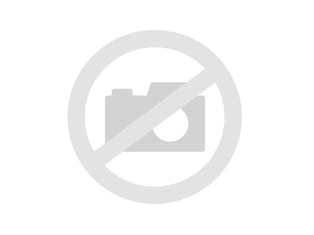
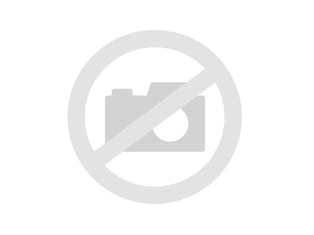
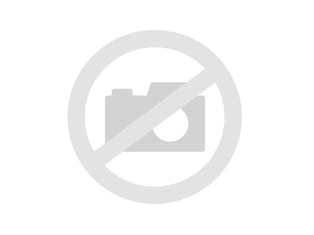
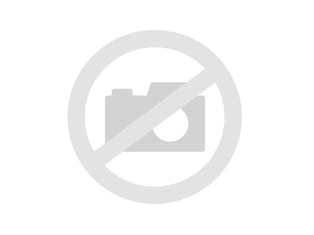
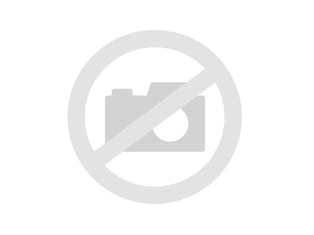

In [9]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

service = Service(excecutable_paht=r'./chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome(service=service,options=options)
busqueda = 'cerveza turia'
#wd.get("https://www.carrefour.es/?q="+busqueda.replace(" ","+"))
wd.get("https://www.carrefour.es/supermercado?ic_source=portal-y-corporativo&ic_medium=category-food-box&ic_content=ns")
#wd.get("https://www.carrefour.es/")
soup = BeautifulSoup(wd.page_source,"lxml")

for div in soup.find_all('div',{"class":"product-card__parent featured-products__item featured-products__item--border"}):
  print(div.findChild('a', {'class':'product-card__title-link track-click'}).text)
  print(div.findChild('span', {'class':'product-card__price'}).text)


In [5]:
for elemento in soup.find_all('div',{'class':'citrus-product-list__item-card'}):
  print(elemento.findChild('a', {'class':'product-card__title-link track-click'}).text)
  try:
    print(elemento.findChild('span', {'class': 'product-card__price'}).text)
  except:
    print('Precio desconocido')